<a href="https://colab.research.google.com/github/hanbitgoun/GJ_AI/blob/main/deep_learning/0721_0727_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/abalone_mini.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4 non-null      object 
 1   0.455   4 non-null      float64
 2   0.365   4 non-null      float64
 3   0.095   4 non-null      float64
 4   0.514   4 non-null      float64
 5   0.2245  4 non-null      float64
 6   0.101   4 non-null      float64
 7   0.15    4 non-null      float64
 8   15      4 non-null      int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 416.0+ bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 불러오기

데이터 분할하기 

파라미터 생성하기 

신경망 연산하기 

역전파 연산하기 

성능 확인하기 

In [ ]:
def main_execute(epoch_count = 10, mb_size = 2, report = 2, train_ratio = 0.8):
  load_dataset()
  weight_initial, bias_initial = init_param()
  losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count, mb_size, report, train_ratio)
  
  return weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc

In [ ]:
# 데이터 로드 & 원핫벡터 처리
def load_dataset():
  with open('/content/abalone.csv' ) as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    rows = []  
    for row in csvreader:
      rows.append(row)
  
  global data, input_cnt, output_cnt
  
  input_cnt, output_cnt = 10, 1
  data = np.zeros( [len(rows),input_cnt + output_cnt] )

  for n, row in enumerate(rows):
    if row[0] == 'M': data[n, 0] = 1
    if row[0] == 'F': data[n, 1] = 1
    if row[0] == 'I': data[n, 2] = 1
    data[n, 3:] = row[1:]  

In [ ]:
%run /content/MathUtils.ipynb
load_dataset()

In [ ]:
print(data)

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      1.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      1.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]


In [ ]:
# 가중치와 편향 설정
def init_param():
  global weight, bias

  weight_initial = []
  bias_initial = []
  weight = np.random.normal(RND_MEAN, RND_STD, size=[input_cnt, output_cnt])
  bias = np.zeros([output_cnt]) # np.zeros 쓰는 이유 : bias 값에 많은영향 따라서 초기값 0으로 설정
  print('initial Weight Value : \n{} '.format(weight))
  print('Initial Bias Value : \n{} '.format(bias))

  weight_initial.append(weight)
  bias_initial.append(bias)

  return weight_initial, bias_initial

In [ ]:
weight_initial, bias_initial = init_param()

initial Weight Value : 
[[-0.04572553]
 [-0.02540183]
 [ 0.04501336]
 [ 0.02834907]
 [-0.02457969]
 [ 0.03824517]
 [-0.00993385]
 [-0.05345577]
 [ 0.03465681]
 [ 0.00118109]] 
Initial Bias Value : 
[0.] 


In [ ]:
def train_and_test():
  pass

In [ ]:
# 데이터 셔플, mini_batch_step_count & test_idx 반환
def arrange_data(mb_size, train_ratio):
  global shuffle_map, test_begin_index

  shuffle_map = np.arange(data.shape[0])
  np.random.shuffle(shuffle_map)

  mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size
  test_begin_index = mini_batch_step_count * mb_size

  return mini_batch_step_count

In [ ]:
mini_batch_step_count = arrange_data(mb_size = 2, train_ratio = 0.8)

In [ ]:
print("mini_batch_step_count :", mini_batch_step_count)
print("shuffle_map :", shuffle_map[:3])
print("test_begin_index : ", test_begin_index)

mini_batch_step_count : 1670
shuffle_map : [2630 3675 3669]
test_begin_index :  3340


In [ ]:
def get_test_data():
  # shuffle된 index로 test_data 분할
  test_data = data[shuffle_map[ test_begin_index: ] ] 
  return test_data[:, :-output_cnt], test_data[:, -output_cnt:]                 

In [ ]:
test_x, test_y = get_test_data()
print(test_x)
print("============================")
print(test_y)

[[0.     1.     0.     ... 0.186  0.11   0.145 ]
 [0.     1.     0.     ... 0.3005 0.131  0.15  ]
 [0.     1.     0.     ... 0.281  0.117  0.1335]
 ...
 [0.     1.     0.     ... 0.1945 0.103  0.155 ]
 [0.     1.     0.     ... 0.643  0.2465 0.416 ]
 [1.     0.     0.     ... 0.4375 0.196  0.325 ]]
[[10.]
 [ 6.]
 [ 7.]
 [11.]
 [15.]
 [12.]
 [11.]
 [10.]
 [ 8.]
 [ 3.]
 [15.]
 [13.]
 [ 6.]
 [10.]
 [14.]
 [ 8.]
 [13.]
 [13.]
 [ 8.]
 [ 8.]
 [ 9.]
 [15.]
 [11.]
 [ 9.]
 [11.]
 [ 7.]
 [12.]
 [10.]
 [13.]
 [ 9.]
 [ 7.]
 [13.]
 [ 7.]
 [ 7.]
 [ 9.]
 [ 6.]
 [11.]
 [12.]
 [10.]
 [10.]
 [10.]
 [ 9.]
 [ 7.]
 [ 8.]
 [ 7.]
 [ 6.]
 [14.]
 [ 8.]
 [ 7.]
 [ 8.]
 [ 9.]
 [16.]
 [ 7.]
 [ 8.]
 [10.]
 [ 5.]
 [11.]
 [11.]
 [ 7.]
 [20.]
 [ 8.]
 [ 6.]
 [11.]
 [10.]
 [ 8.]
 [13.]
 [21.]
 [11.]
 [ 9.]
 [ 8.]
 [ 8.]
 [ 8.]
 [22.]
 [13.]
 [13.]
 [12.]
 [ 7.]
 [10.]
 [ 8.]
 [10.]
 [ 6.]
 [ 7.]
 [ 8.]
 [13.]
 [12.]
 [12.]
 [11.]
 [12.]
 [14.]
 [11.]
 [ 9.]
 [ 8.]
 [10.]
 [17.]
 [20.]
 [14.]
 [ 8.]
 [ 8.]
 [ 4.]
 [11.]


In [ ]:
def get_train_data(mb_size, n):
    if n == 0 :
        np.random.shuffle(shuffle_map[:test_begin_index])

    train_data = data[shuffle_map[mb_size * n : mb_size * (n+1)]]

    return train_data[:, : -output_cnt], train_data[:, -output_cnt : ]

In [ ]:
train_x, train_y = get_train_data(mb_size = 2 , n = 0)
print(train_x)
print("========================")
print(train_y)

[[1.     0.     0.     0.615  0.49   0.17   1.145  0.4915 0.208  0.343 ]
 [1.     0.     0.     0.61   0.48   0.15   1.1495 0.564  0.274  0.264 ]]
[[13.]
 [ 8.]]


In [ ]:
mb_size = 2

train_data_mini_1 = data[shuffle_map[ 0 : 2 ]]
train_data_mini_2 = data[shuffle_map[ 2 : 4 ]]
train_data_mini_3 = data[shuffle_map[ 4 : 6 ]]
train_data_mini_4 = data[shuffle_map[ 6 : 8 ]]

train_data_mini_n = data[shuffle_map[ mb_size * 0 : mb_size * (0+1)]]
train_data_mini_n = data[shuffle_map[ mb_size * 1 : mb_size * (1+1)]]
train_data_mini_n = data[shuffle_map[ mb_size * 2 : mb_size * (2+1)]]
train_data_mini_n = data[shuffle_map[ mb_size * 3 : mb_size * (3+1)]]

#train_data_mini_n = data[shuffle_map[ mb_size * n : mb_size * (n+1)]]

In [ ]:
def run_train(x, y):
    loss = 0
    accuracy = 100
    return loss, accuracy

run_train(0,0)

(0, 100)

In [ ]:
def run_test(x, y):
    accuracy = 95
    return accuracy

run_test(0,0)

95

#### 07_23

In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
    mini_batch_step_count = arrange_data(mb_size, train_ratio)

    test_x, test_y = get_test_data()
    losses_mean_row, accs_mean_row = [], []

    for epoch in range(epoch_count):
        losses = []
        accs   = []
        for n in range(mini_batch_step_count):
            train_x ,train_y = get_train_data(mb_size, n)
            loss, acc = run_train(train_x, train_y)
            losses.append(loss)
            accs.append(acc)
        
        if report > 0 and (epoch + 1) % report == 0:
            acc = run_test(test_x, test_y)
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Test - Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), acc))
            
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs) * 100

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)

    final_acc = run_test(test_x, test_y)
    print("="*30, "Final TEST", "="*30)
    print("\nFinal Accuracy : {}".format(final_acc))

    return losses_mean_row, accs_mean_row, final_acc

In [ ]:
losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count = 10,
                                                           mb_size = 2, 
                                                           report = 1, 
                                                           train_ratio = 0.8)

Epoch 1 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 6 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 7 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 8 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 9 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
Epoch 10 : Train - Loss = 0.000, Accuracy = 100.000 / Test - Accuracy = 95.000
============================== Final TEST ==============================

Final Accuracy : 95


In [ ]:
epoch_count = 10
report      = 4

for epoch in range(epoch_count):
    print((epoch + 1) % report == 0)

False
False
False
True
False
False
False
True
False
False


In [ ]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias 
    # x > backprop_neuralnet
    return y_hat, x                     

In [ ]:
y_hat, _ = forward_neuralnet(train_x)
print(y_hat)
print(y_hat.shape)

[[-0.06386726]
 [-0.06625431]]
(2, 1)


In [ ]:
def forward_postproc(y_hat, y):
  diff = y_hat - y
  square = np.square(diff)
  loss = np.mean(square)
  # diff > backprop_postproc
  return loss, diff             

In [ ]:
loss = forward_postproc(y_hat, train_y)
print('MSE : ', loss)

MSE :  (117.86454321815947, array([[-13.06386726],
       [ -8.06625431]]))


In [ ]:
def eval_accuracy(y_hat, y):
  # 오차율 mdiff , 하나의 값으로 만들기 위해 np.mean 사용
  mdiff = np.mean(np.abs((y_hat - y) / y))  
  return 1 - mdiff

In [ ]:
acc = eval_accuracy(y_hat, train_y)
print('ACC : {:.3f}'.format(acc * 100))

ACC : -0.660


In [ ]:
# backprop_nueralnet : 가중치, 편향 경사하강법 연산 (수업자료 참고)
def backprop_nueralnet(G_output, x):
  global weight, bias
  x_transpose = x.transpose()
  G_w = np.matmul(x_transpose, G_output)
  G_b = np.sum(G_output, axis = 0)

  weight -= LEARNING_RATE * G_w
  bias   -= LEARNING_RATE * G_b

In [ ]:
diff = y_hat - train_y
square = np.square(diff)
print('square : \n', square)
print('diff shape ; ', diff.shape)

row_count_M = diff.shape[0]
col_count_N = diff.shape[1]
print('row_count_M : ', row_count_M)
print('col_count_N : ', col_count_N)

square : 
 [[170.66462778]
 [ 65.06445866]]
diff shape ;  (2, 1)
row_count_M :  2
col_count_N :  1


In [ ]:
mse = (square[0][0] + square[1][0]) / (row_count_M + col_count_N)
print('MSE : ', mse)

MSE :  78.57636214543965


In [ ]:
def backprop_postproc(diff):
  M_N = diff.shape
  g_mse_square = np.ones(M_N) / np.prod(M_N)
  g_square_diff = 2 * diff
  g_diff_output = 1

  G_diff = g_mse_square * g_square_diff
  G_output = g_diff_output * G_diff

  return G_output

In [ ]:
def run_train(x, y):
  # 순전파
  y_hat, aux_nn_x = forward_neuralnet(x)
  loss, aux_pp_diff = forward_postproc(y_hat, y)

  accuracy = eval_accuracy(y_hat, y)
  
  # 역전파
  G_output = backprop_postproc(aux_pp_diff)
  backprop_nueralnet(G_output, aux_nn_x)

  return loss, accuracy

In [ ]:
def run_test(x, y):
  y_hat, _ = forward_neuralnet(x)
  accuracy = eval_accuracy(y_hat, y)

  return accuracy

In [ ]:
weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc = main_execute(epoch_count = 1000, mb_size = 36, report = 50, train_ratio = 0.8)

initial Weight Value : 
[[-0.03867246]
 [-0.04705227]
 [ 0.00877279]
 [-0.01016111]
 [ 0.02459196]
 [ 0.05817322]
 [ 0.03484871]
 [ 0.02605906]
 [-0.00691521]
 [ 0.00746208]] 
Initial Bias Value : 
[0.] 
Epoch 50 : Train - Loss = 4.835, Accuracy = 0.838 / Test - Accuracy = 0.848
Epoch 100 : Train - Loss = 4.796, Accuracy = 0.839 / Test - Accuracy = 0.840
Epoch 150 : Train - Loss = 4.780, Accuracy = 0.839 / Test - Accuracy = 0.829
Epoch 200 : Train - Loss = 4.778, Accuracy = 0.839 / Test - Accuracy = 0.841
Epoch 250 : Train - Loss = 4.777, Accuracy = 0.839 / Test - Accuracy = 0.837
Epoch 300 : Train - Loss = 4.760, Accuracy = 0.839 / Test - Accuracy = 0.848
Epoch 350 : Train - Loss = 4.762, Accuracy = 0.839 / Test - Accuracy = 0.844
Epoch 400 : Train - Loss = 4.778, Accuracy = 0.840 / Test - Accuracy = 0.837
Epoch 450 : Train - Loss = 4.773, Accuracy = 0.840 / Test - Accuracy = 0.835
Epoch 500 : Train - Loss = 4.784, Accuracy = 0.839 / Test - Accuracy = 0.848
Epoch 550 : Train - Loss = 

#### 0727 + 저번시간복습

In [ ]:
print('weight : \n', weight)
print('bias : \n', bias)

weight : 
 [[  1.29792306]
 [  1.04462238]
 [  0.38715993]
 [  0.02335522]
 [ 10.45666974]
 [  9.72304926]
 [  8.1872382 ]
 [-19.18394693]
 [ -9.25774857]
 [  9.44206416]]
bias : 
 [2.8066573]


In [ ]:
new_x = [0, 1, 0, 0.685,0.545, 0.18,1.42,0.674,0.392,0.5]

pred_Y, _ = forward_neuralnet(new_x)
print('pred_Y : ', pred_Y)

pred_Y :  [11.10420454]


In [ ]:
import matplotlib.pyplot as plt

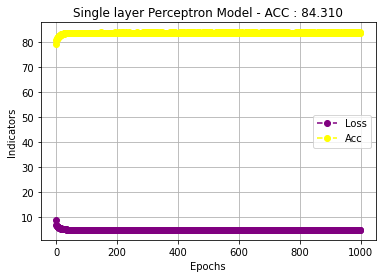

In [ ]:
# 시각화
plt.plot(losses_mean_row, '--o', color='purple', label='Loss')
plt.plot(accs_mean_row, '--o', color='yellow', label='Acc')

plt.title('Single layer Perceptron Model - ACC : {:.3f}'.\
          format(final_acc * 100))

plt.xlabel('Epochs')
plt.ylabel('Indicators')
plt.grid()
plt.legend()

plt.show()